# REGRESSION USING ANN

In [58]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
housing=fetch_california_housing()

In [61]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [62]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [63]:
x=pd.DataFrame(housing.data,columns=housing.feature_names)

In [64]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [65]:
y=pd.DataFrame(housing.target,columns=['target'])

In [66]:
x.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [67]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x,y,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full,random_state=42)


In [68]:
x_train_full.shape

(15480, 6)

In [69]:
x_train.shape

(11610, 6)

In [70]:
x_val.shape

(3870, 6)

In [71]:
x_test.shape

(5160, 6)

In [72]:
Layers=[tf.keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
        tf.keras.layers.Dense(10,activation='relu'),
        tf.keras.layers.Dense(5,activation='relu'),
        tf.keras.layers.Dense(1)]

/Users/mohamedhamdeen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model=tf.keras.Sequential(Layers)

In [74]:
loss='mse'
optimizers='sgd'

model.compile(optimizer=optimizers,loss=loss)

In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [77]:
epochs=20

history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 1.5797 - val_loss: 0.4762
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.4797 - val_loss: 0.4397
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.4751 - val_loss: 0.4290
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.4396 - val_loss: 0.6252
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4513 - val_loss: 0.4143
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.4409 - val_loss: 0.4090
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.4296 - val_loss: 0.4062
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.4340 - val_loss: 0.4182
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.4163 - val_loss: 0.4319
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4239 - val_loss: 0.4014
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.4178 - val_loss: 0.4075
Epoch 12/20
363/363 ━━━━━━━━━━

In [78]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.854576,0.476187
1,0.488932,0.439696
2,0.461297,0.428997
3,0.451502,0.625236
4,0.447517,0.414258
5,0.440820,0.409046
6,0.437337,0.406164
7,0.433714,0.418162
8,0.429657,0.431882
9,0.429187,0.401436


In [79]:
import matplotlib.pyplot as plt

<Axes: >

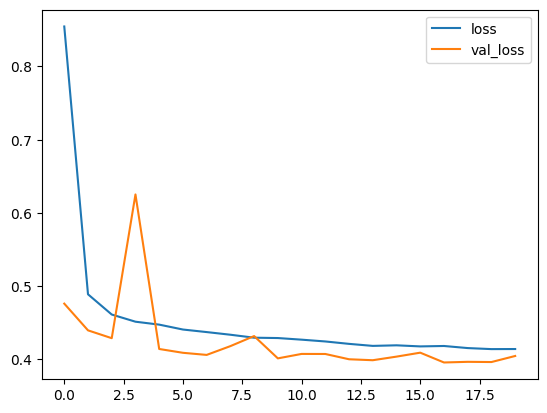

In [80]:
pd.DataFrame(history.history).plot()

In [81]:
model.evaluate(x_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.4287


0.4278440475463867

In [82]:
new=x_test[0]

In [83]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [84]:
new.reshape((1,6)).shape

(1, 6)

In [85]:
model.predict(new.reshape((1,6)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.7946139]], dtype=float32)

# using callbacks

In [86]:
model2=tf.keras.Sequential(Layers)
model.compile(optimizer=optimizers,loss=loss)

In [87]:
epochs=20

checkpoint=tf.keras.callbacks.ModelCheckpoint('model.keras',save_best_only=True)

early_stopping=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs')

callbacks=[checkpoint,early_stopping,tensorboard]

In [88]:
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val,y_val),callbacks=callbacks)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.4188 - val_loss: 0.4047
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.4125 - val_loss: 0.3956
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.4001 - val_loss: 0.5275
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.4058 - val_loss: 0.4020
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.4143 - val_loss: 0.4018
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.4007 - val_loss: 0.3948
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.4023 - val_loss: 0.4003
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4111 - val_loss: 0.3979
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.4115 - val_loss: 0.3915
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.3912 - val_loss: 0.4417
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.4028 - val_loss: 0.4059
Epoch 12/20
363/363 ━━━━━━━━━━

In [89]:
%reload_ext tensorboard

In [90]:
%tensorboard --logdir='logs'

Reusing TensorBoard on port 6006 (pid 93977), started 0:01:19 ago. (Use '!kill 93977' to kill it.)